# 국민건강보험공단 건강 검진 데이터 (~2021.12.29)

가설을 세우고 분석을 통해 검정해보는 시간

example 가설 
1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

## 0. 필요한 패키지 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
pd.set_option('display.max_rows', None)
%config InlineBackend.figure_format = 'retina'
## chart style 지정, 스타일 유형은 아래 링크 참고
## https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('tableau-colorblind10')

## 1. 데이터 로드

In [3]:
nhis_url = "https://raw.githubusercontent.com/bokyungB/visualization_course/main/data/NHIS_healthcheckinfo_20211229.CSV"
nhis = pd.read_csv(nhis_url,sep=",",encoding='cp949')

In [4]:
nhis.shape

(1000000, 31)

In [5]:
nhis.tail(5)

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
999995,2020,999996,41,2,13,145,55,81.0,0.9,1.0,...,0.6,21.0,25.0,18.0,1.0,0.0,0,NaN,NaN,2021-12-29
999996,2020,999997,26,2,12,160,55,76.5,1.5,1.5,...,0.8,21.0,14.0,19.0,1.0,1.0,0,NaN,NaN,2021-12-29
999997,2020,999998,48,1,9,175,70,85.0,1.2,1.2,...,0.9,26.0,20.0,17.0,1.0,1.0,0,NaN,NaN,2021-12-29
999998,2020,999999,48,2,9,160,70,91.0,0.6,0.5,...,1.0,25.0,29.0,13.0,1.0,0.0,0,NaN,NaN,2021-12-29
999999,2020,1000000,28,1,11,160,55,76.1,2.0,2.0,...,0.9,17.0,13.0,24.0,2.0,0.0,0,NaN,NaN,2021-12-29


In [6]:
nhis.sample()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
5211,2020,5212,48,2,12,150,55,72.0,0.7,0.6,...,0.9,27.0,24.0,32.0,1.0,1.0,1,0.0,0.0,2021-12-29


### +) 데이터 부가 설명 

* 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터입니다.

    <details>
    <summary> 데이터 항목명 자세한 설명</summary>

    * 각각의 빈 항목은 개개인별 실행하지 않은 부분 입니다.
    * 2020년도는 ＂결손치 유무, 치아마모증유무, 제3대구치(사랑니) 이상＂ 미시행으로 항목 삭제
    * 2020 년 청력 항목 답변 변경으로 인해 1: 정상, 2:질환의심, 3: 측정 불가로 바뀝
    * 흡연 상태에 전자 담배에 대한 내용은 포함되지 않았음.
  
    <img src="https://i.imgur.com/Twtlh6W.png">

    <img src="https://i.imgur.com/GJqg05v.png">

    </details>


공공데이터 개방서비스( http://nhiss.nhis.or.kr/op/it/index.do )에서도 다운로드 받을 수 있음.


## 2. 데이터셋 파악

In [7]:
nhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [8]:
# TODO Q1 .컬럼명 확인하기

<details>
<summary> 컬럼명 확인하기</summary>
['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압', '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자']

</details>

In [9]:
# 결측치 확인
# isnull을 통해 결측치를 bool값으로 표시하고, sum 으로 컬럼당 결측치 확인
nhis.isnull().sum()

# isna 로도 확인가능 nhis.isna().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

### + 참고) 한국어 깨지지 않게 하는 방법 
1. import matplotlib
2. 글꼴 다운 받기 (https://hangeul.naver.com/2017/nanum)
3. mpl.matplotlib_fname() 로 출력되는 폴더로 이동
4. 다운 받은 글꼴 fonts/ttf에 넣어주기  
5. print(mpl.rcParams['font.family']) 로 기존 글꼴 확인하기
6. mpl.rcParams['font.family'] = 'NanumGothic' 로 설정하기 
7. 그래프로 확인해보기

In [10]:
## step1. import matplotlib
import matplotlib as mpl

## step3. 출력되는 폴더 확인 
print(mpl.matplotlib_fname())

## step5. 기존 글꼴 확인하기
print(mpl.rcParams['font.family'])

## step6. 한글 폰트로 설정
mpl.rcParams['font.family'] = 'NanumGothic'
# print(mpl.rcParams['font.family'])

c:\Users\bigda\anaconda3\envs\aisample\lib\site-packages\matplotlib\mpl-data\matplotlibrc


<AxesSubplot:>

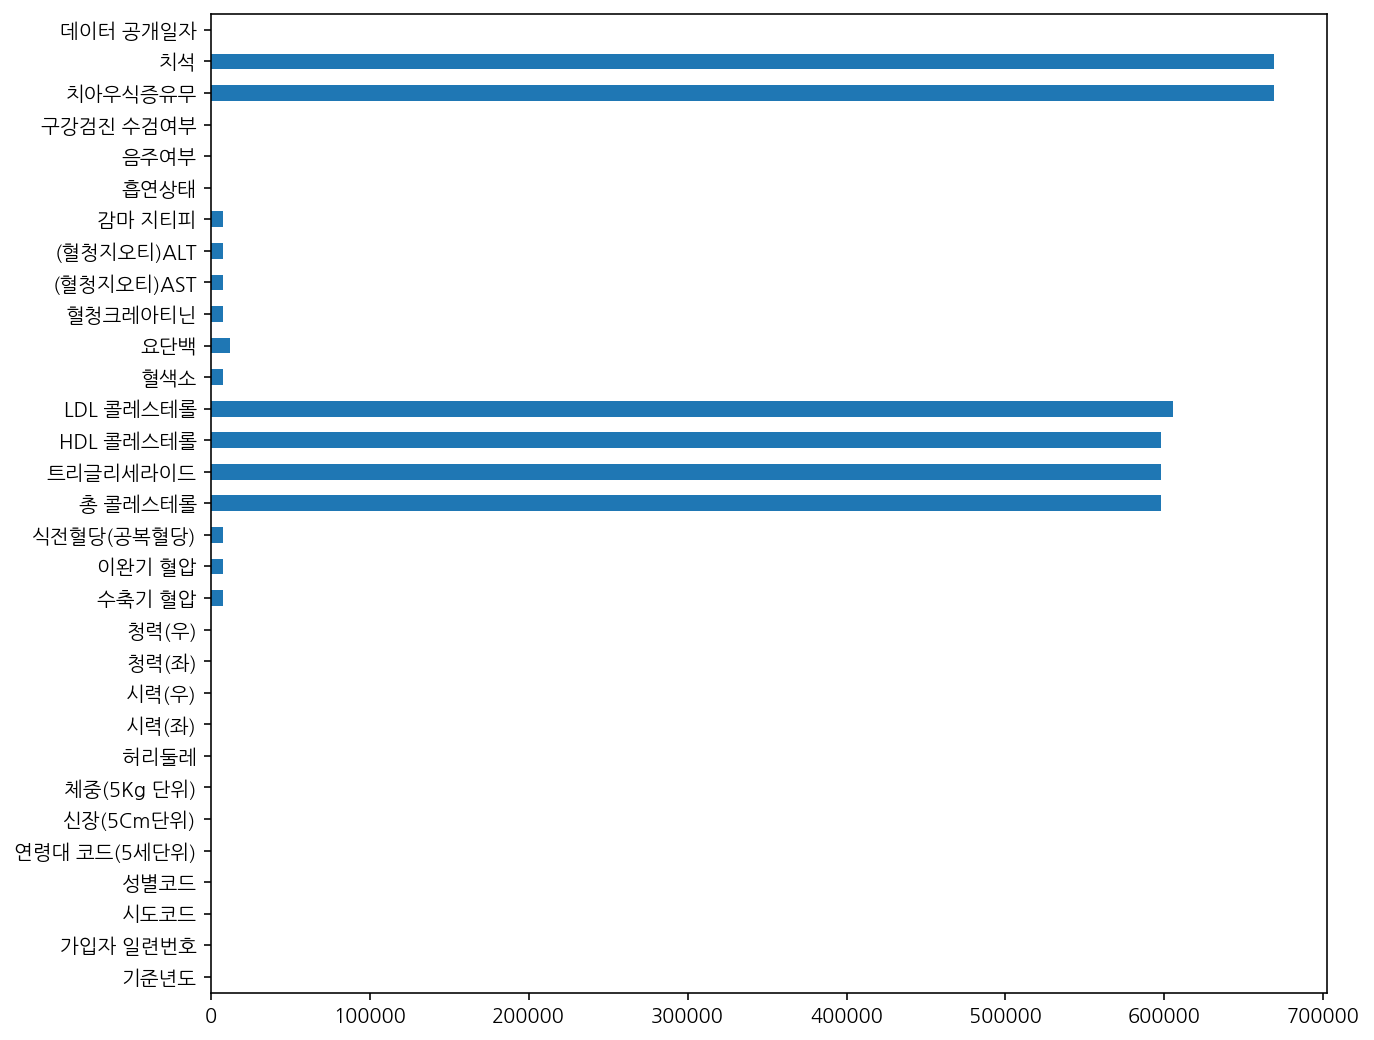

In [66]:
## step7. pandas에 내장된 plot을 통해 시각화 해보기

nhis.isnull().sum().plot.barh(figsize=(10, 9))

## 3. 값 집계하기 
* value_counts
* groupby
* pivot_table

### value_counts

In [22]:
## value_counts
print(nhis["성별코드"].value_counts(),'\n')
print(nhis["흡연상태"].value_counts())

1    510689
2    489311
Name: 성별코드, dtype: int64 

1.0    626138
2.0    189808
3.0    183711
Name: 흡연상태, dtype: int64


### groupby

In [33]:
## groupby 
## 성별코드(1:남, 2:여) 와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
print(nhis.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count())

## TODO Q2. 성별코드와 음주여부로 그룹화를 하고 감마지티피의 "평균" 을 구해봅시다


## 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약 수치를 구합니다
nhis.groupby(["성별코드", "음주여부"])["감마 지티피"].describe()

성별코드  음주여부
1     0.0     131844
      1.0     378767
2     0.0     283275
      1.0     205918
Name: 가입자 일련번호, dtype: int64
성별코드  음주여부
1     0.0     34.212195
      1.0     55.059597
2     0.0     24.177603
      1.0     26.728777
Name: 감마 지티피, dtype: float64


count       mean        std  min   25%   50%   75%     max
성별코드 음주여부                                                               
1    0.0   130103.0  34.212195  38.533470  1.0  18.0  25.0  37.0  1731.0
     1.0   377769.0  55.059597  69.135224  1.0  24.0  36.0  60.0  2630.0
2    0.0   279033.0  24.177603  26.897676  1.0  14.0  18.0  26.0   999.0
     1.0   205296.0  26.728777  36.415153  1.0  14.0  18.0  27.0   999.0

In [35]:
## agg을 사용하면 여러 수치를 함께 구할 수 있습니다.

nhis.groupby(["성별코드", "음주여부"])["감마 지티피"].agg(
    ["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   130103  34.212195    25.0
     1.0   377769  55.059597    36.0
2    0.0   279033  24.177603    18.0
     1.0   205296  26.728777    18.0

### pivot_table

In [52]:
## 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
nhis.pivot_table(index="음주여부", values="가입자 일련번호", aggfunc="count")

,가입자 일련번호
음주여부,
0.0,415119
1.0,584685


In [ ]:
## TODO Q3. 음주 여부에 따른 감마지피티의 평균을 구해봅시다.


In [38]:
## groupby와 유사한 인자로 aggfunc에 여러 값을 한번에 지정해 pivot table 출력이 가능합니다.

pd.pivot_table(nhis, index="음주여부", values="감마 지티피", 
               aggfunc=["mean", "median"])

,mean,median
,감마 지티피,감마 지티피
음주여부,,
0.0,27.368548,20.0
1.0,45.084373,28.0


In [40]:
## aggfunc에 describe를 사용해 통계 요약값을 한번에 볼 수도 있습니다. 
pd.pivot_table(nhis, index="음주여부", values="감마 지티피", 
               aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,15.0,20.0,30.0,409136.0,1731.0,27.368548,1.0,31.423282
1.0,18.0,28.0,48.0,583065.0,2630.0,45.084373,1.0,61.210826


In [ ]:
## TODO Q4. 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구해봅시다


## 4. 시각화

### 4.1 판다스 내장 기능 활용

c:\Users\bigda\anaconda3\envs\aisample\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


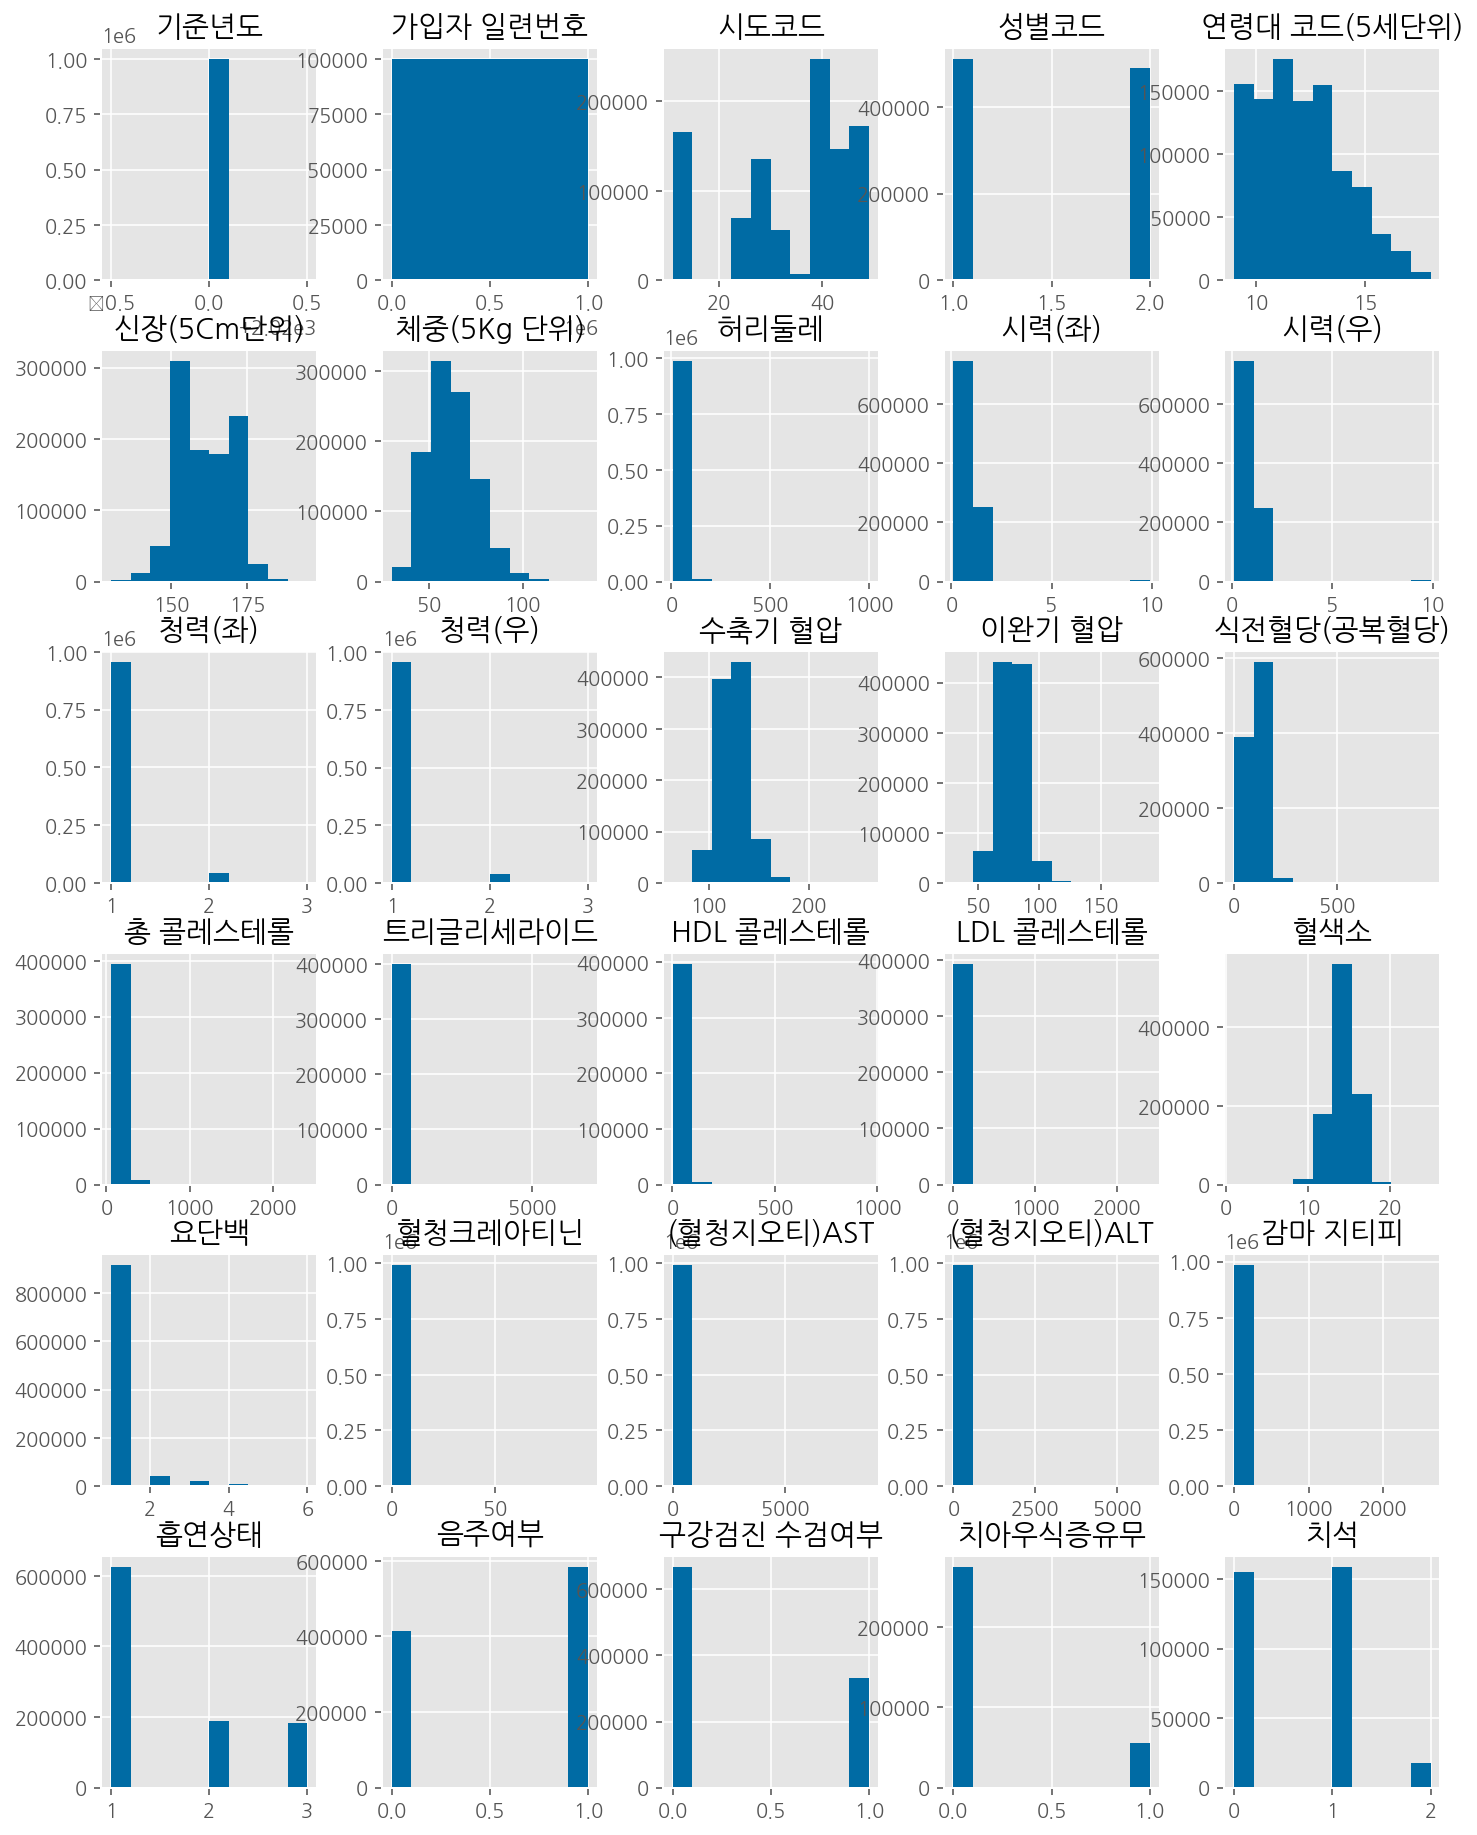

In [73]:
## 히스토그램 

## 전체 데이터에 대한 히스토그램 출력
nhis.hist(figsize=(12, 16))
plt.show()

- 슬라이싱을 사용해 히스토그램 그리기
  
    :  데이터 프레임을 슬라이싱해 해당 데이터만 시각화 할 수 있습니다. 

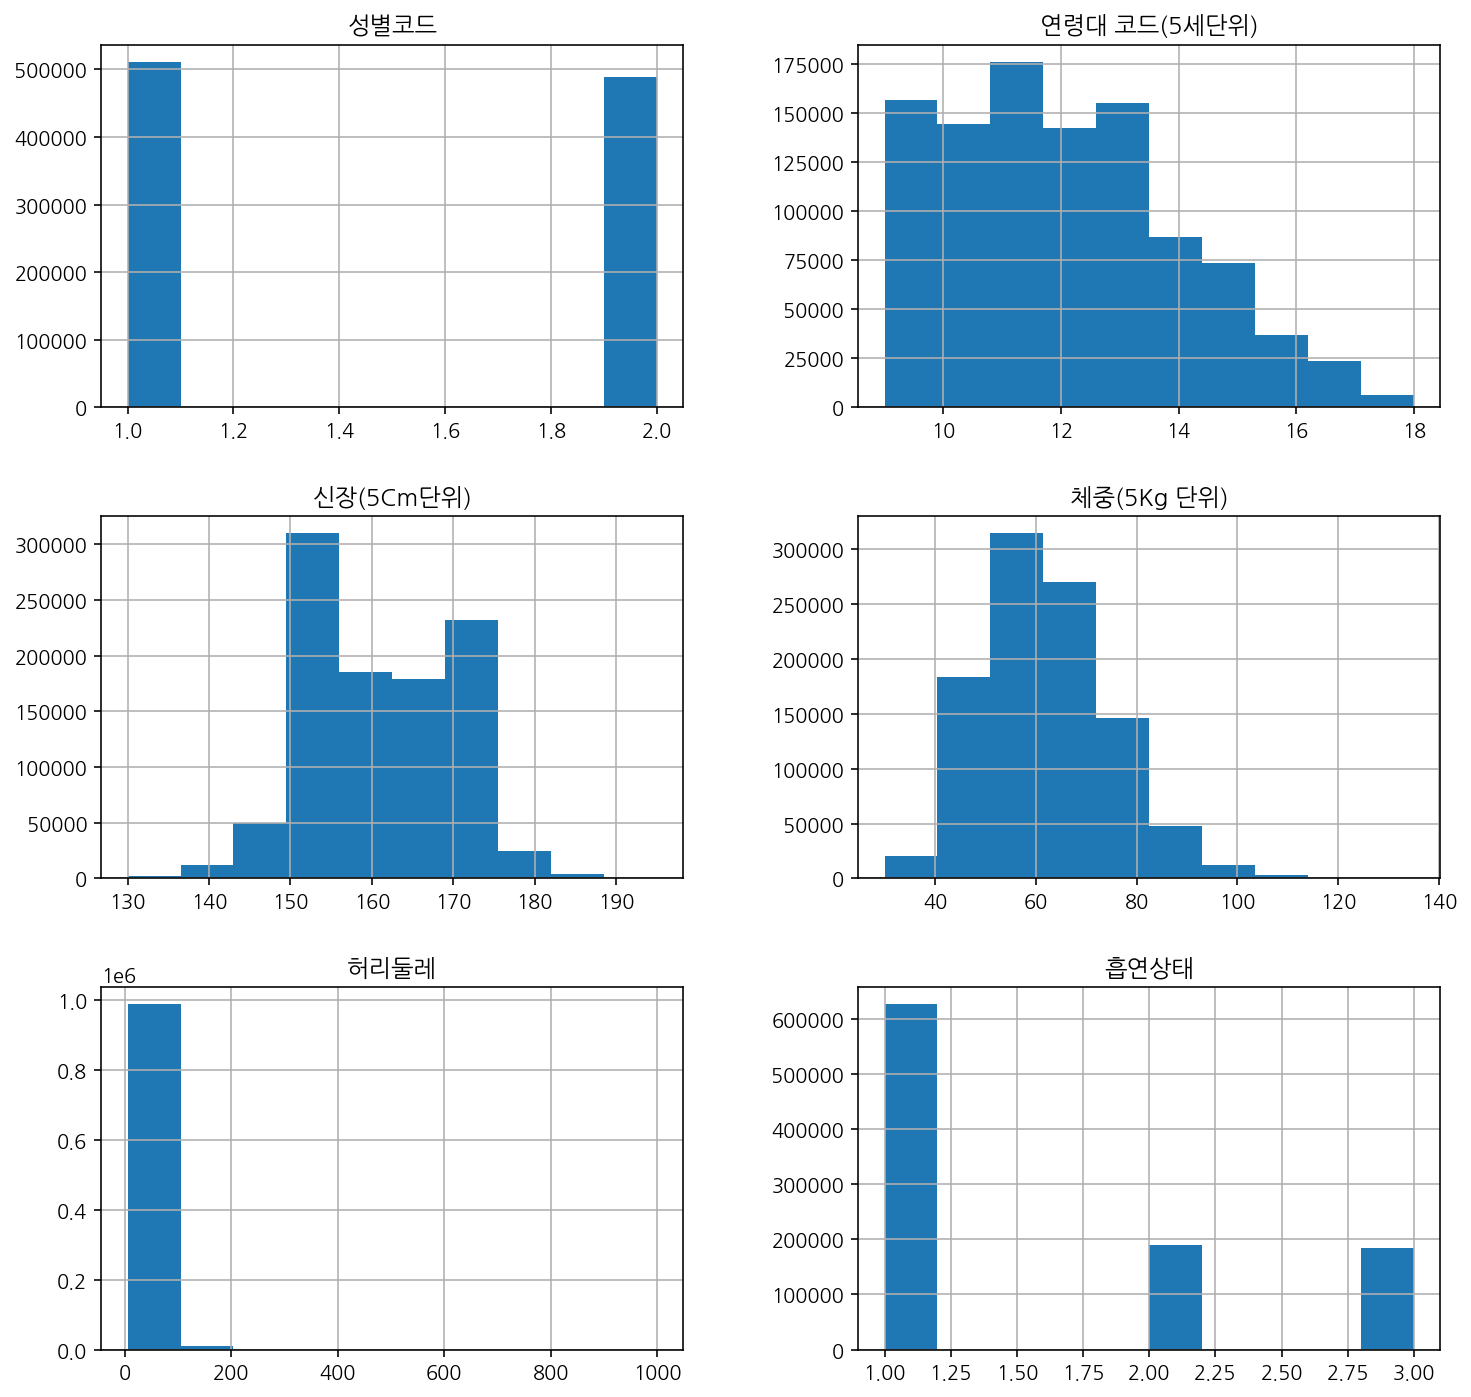

In [49]:
h = nhis.loc[:, ['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', '허리둘레', '흡연상태']].hist(figsize=(12, 12))

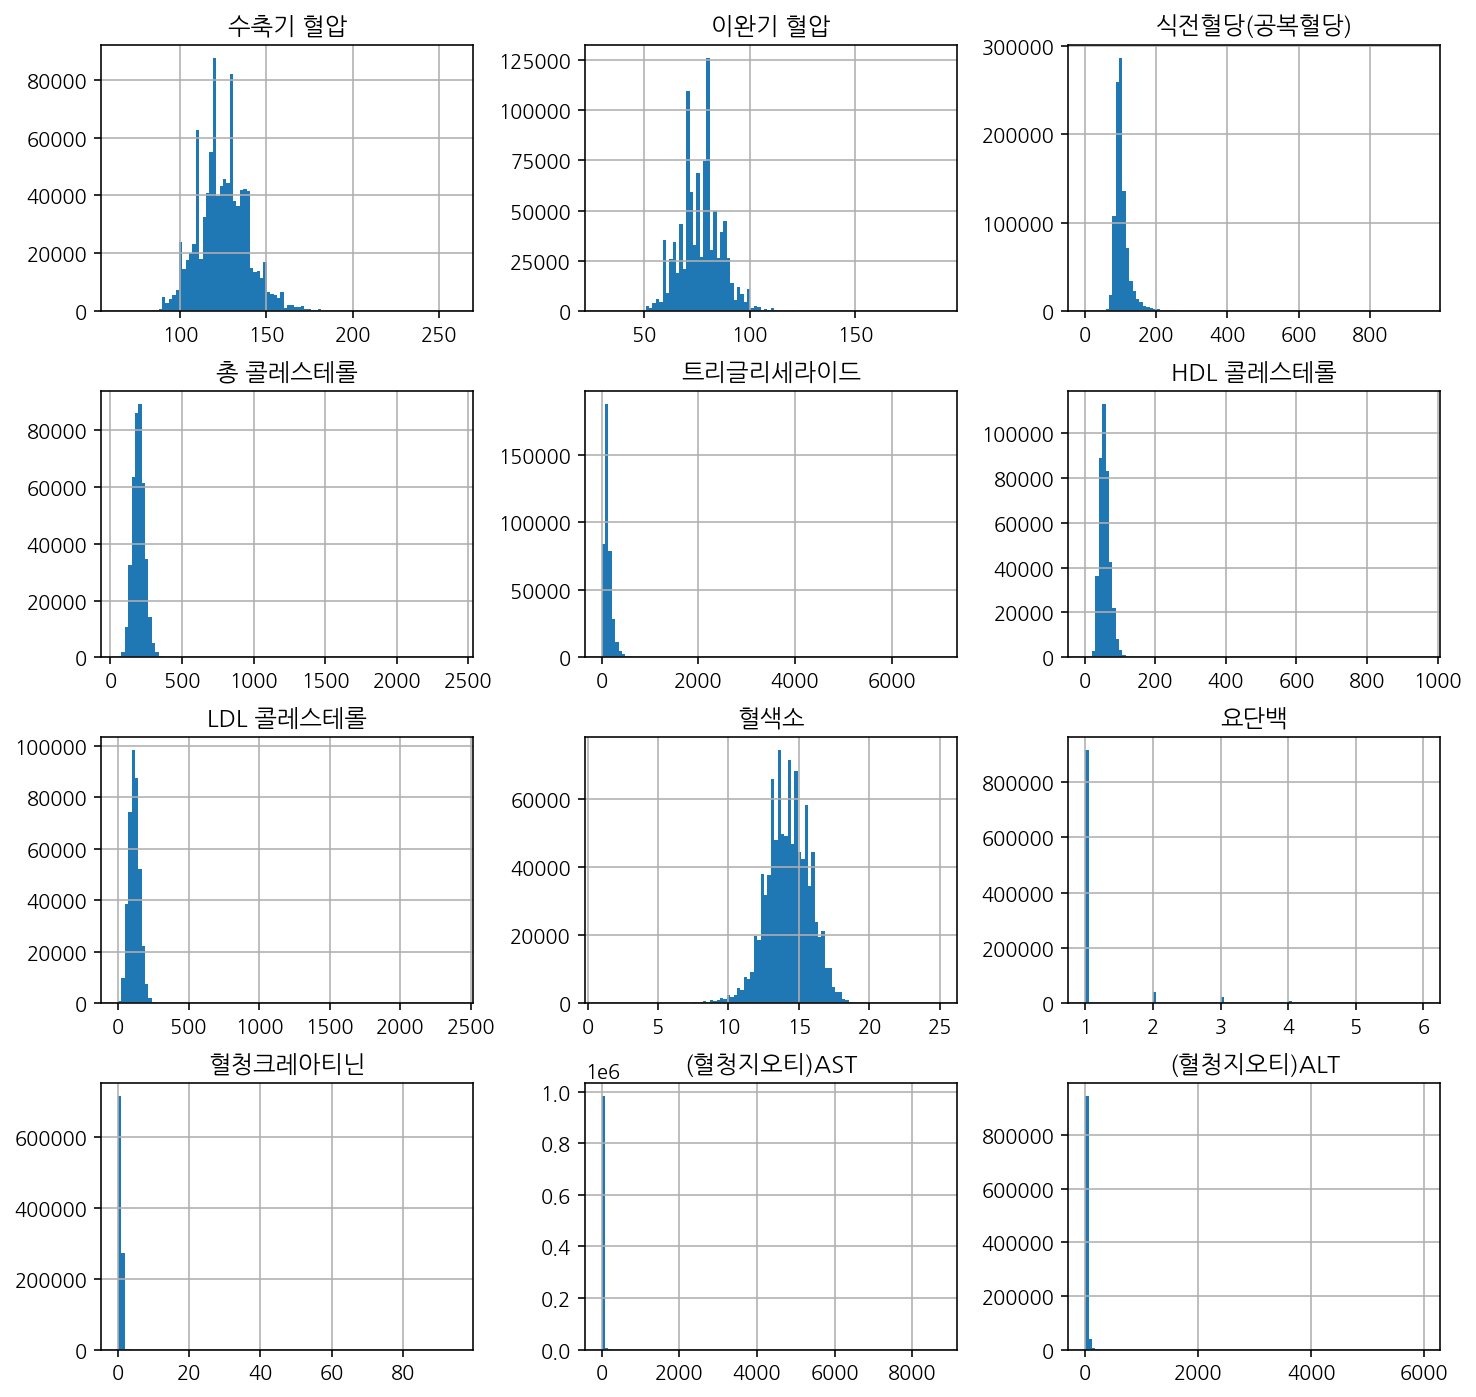

In [50]:
## TODO Q5. iloc로 수축기 혈압 ~(혈청지오티)ALT 에 해당하는 히스토그램을 시각화 해봅시다. 

### 4-2. 범주형 데이터 시각화

#### 음주여부 (막대그래프)

##### matplotlib version

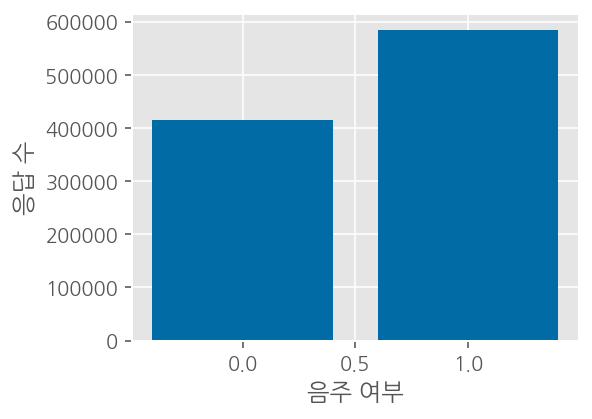

In [72]:
plt.figure(figsize=(4,3))
target= nhis['음주여부'].value_counts()
plt.bar(target.index, target)
plt.ylabel('응답 수')
plt.xlabel('음주 여부')
plt.show()

In [102]:
t = nhis.groupby(["성별코드", "음주여부"])["가입자 일련번호"].count()
male , female = t.loc[1,] , t.loc[2,]
print(male, female)

음주여부
0.0    131844
1.0    378767
Name: 가입자 일련번호, dtype: int64 음주여부
0.0    283275
1.0    205918
Name: 가입자 일련번호, dtype: int64


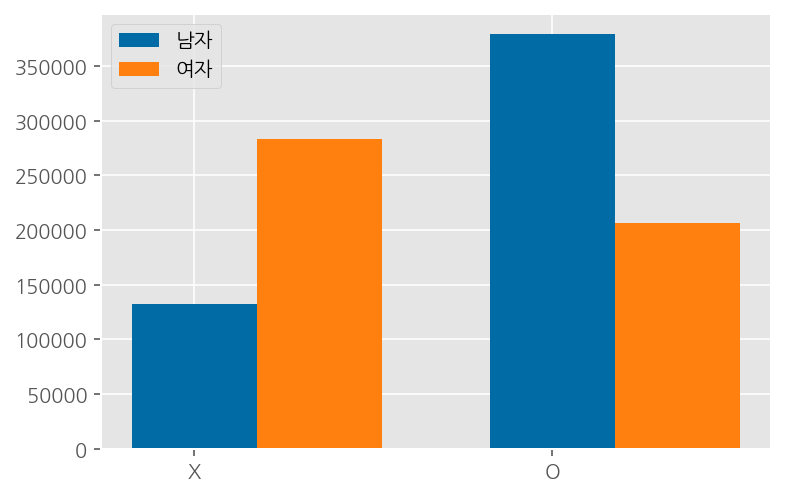

In [103]:
x_labels=['X','O']
pos = np.arange(len(x_labels))
Gender = ['남자','여자']
bar_width = 0.35

plt.bar(pos, male,bar_width)
plt.bar(pos+bar_width, female,bar_width)
plt.xticks(pos, x_labels)
plt.legend(Gender,loc=2)
plt.show()

In [112]:
# TODO Q6. x축을 연령대코드로 범례를 음주여부로 하는 그래프를 작성해봅시다.

##### seaborn version

In [107]:
## seaborn 은 matplotlib를 쉽게 사용할 수 있도록 도와줍니다. 간단하게 고급 통계 연산 가능합니다.
try:
    import seaborn as sns
except:
    ! pip install seaborn
    import seaborn as sns
finally:
    print(sns.__version__)

0.11.2


<AxesSubplot:xlabel='음주여부', ylabel='count'>

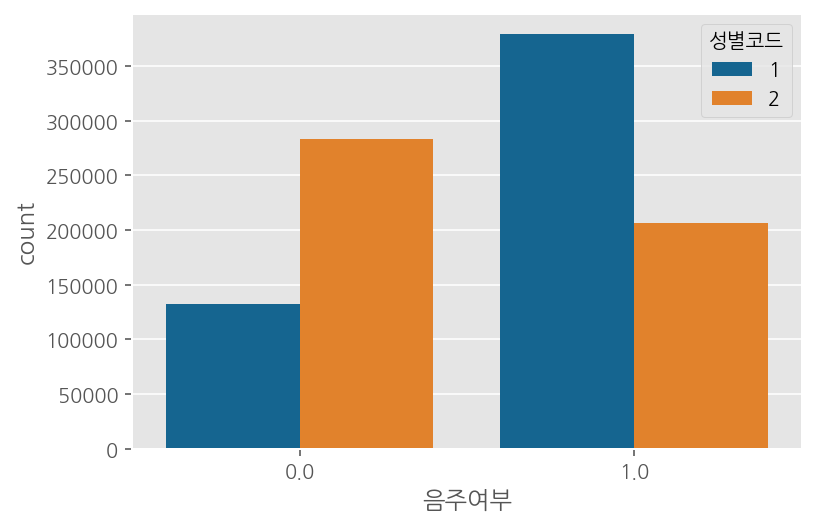

In [111]:
sns.countplot(data=nhis, x="음주여부", hue="성별코드")

In [ ]:
# TODO Q7. x축을 연령대코드로 범례를 음주여부로 하는 그래프를 작성해봅시다.

#### 음주여부 (라인 그래프) 

##### matplotlib version

In [134]:
hemoglobin_by_age = nhis.groupby(["연령대 코드(5세단위)", "음주여부"])["혈색소"].mean()
hemoglobin_by_age

연령대 코드(5세단위)  음주여부
9             0.0     13.886780
              1.0     14.592899
10            0.0     13.751120
              1.0     14.517020
11            0.0     13.883419
              1.0     14.580787
12            0.0     13.926153
              1.0     14.614677
13            0.0     13.836416
              1.0     14.569112
14            0.0     13.736248
              1.0     14.493237
15            0.0     13.582816
              1.0     14.370973
16            0.0     13.311981
              1.0     14.163575
17            0.0     13.075501
              1.0     13.831458
18            0.0     12.502711
              1.0     13.390067
Name: 혈색소, dtype: float64

In [143]:
unlevel_hba = hemoglobin_by_age.reset_index(level=[0,1])

##### seaborn version

<AxesSubplot:xlabel='연령대 코드(5세단위)', ylabel='혈색소'>

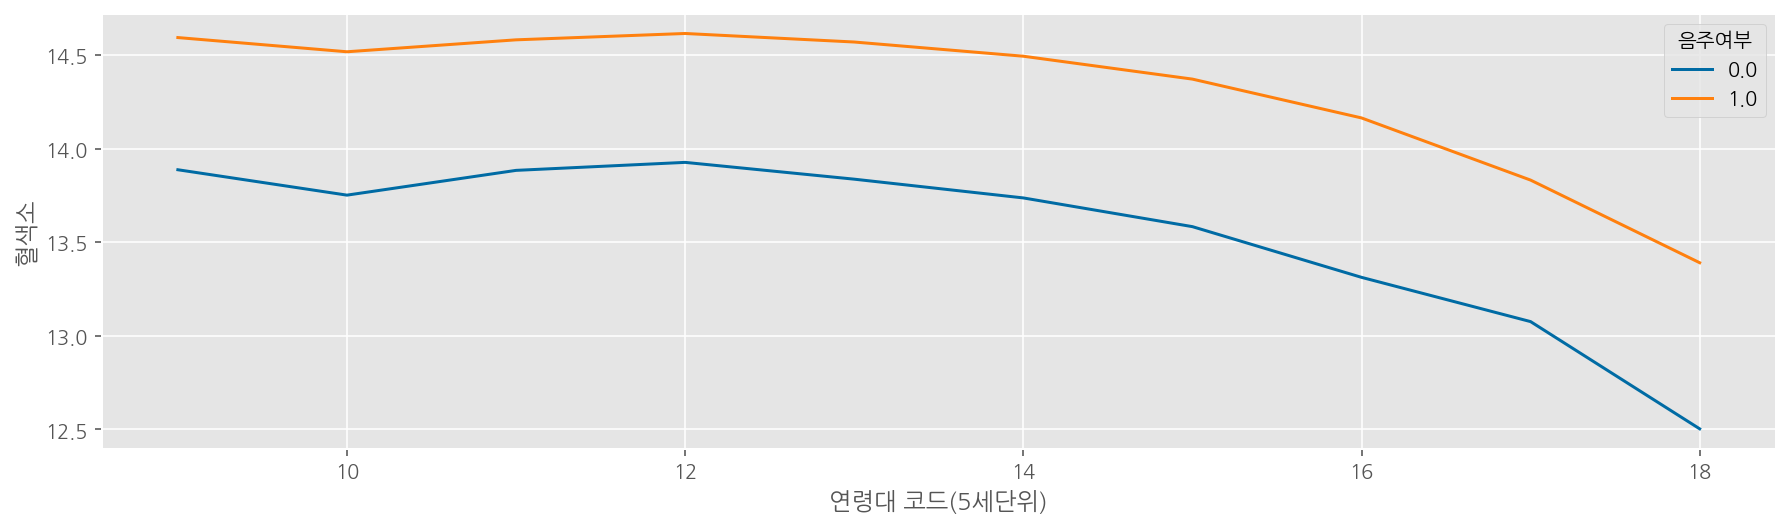

In [144]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=unlevel_hba, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

#### 음주여부 (라인 그래프) 

##### matplotlib version

##### seaborn version

In [ ]:
plt.figure(figsize=(15, 4))
sns.lineplot(data=nhis, x="연령대 코드(5세단위)", y="혈색소", hue="음주여부", ci=None)